C:\Users\DIEGO\AppData\Local\Temp/ipykernel_21228/4265812226.py:13: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(path)
C:\Users\DIEGO\AppData\Local\Temp/ipykernel_21228/4265812226.py:17: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  productos= driver.find_elements_by_class_name("product_info")
C:\Users\DIEGO\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:341: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
C:\Users\DIEGO\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:359: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")
C:\Users\DIEGO\anaconda3\lib

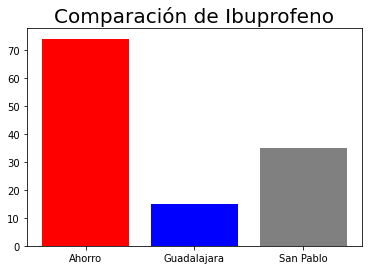

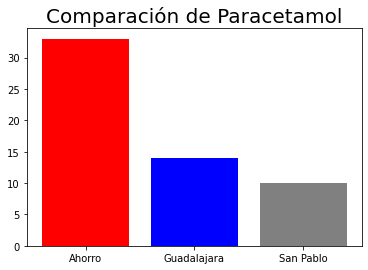

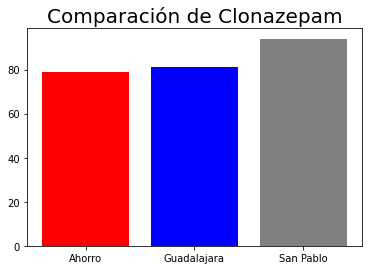

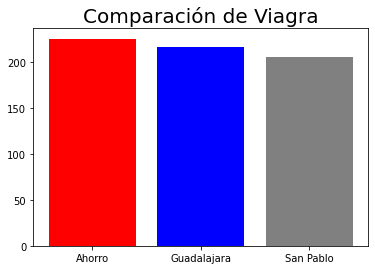

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandasql as ps
import time 
import numpy as np
from selenium import webdriver
aux=pd.DataFrame()
aux.to_excel("df_proyecto.xlsx",index=False)

def Buscador_Precios_FGuadalajara(producto,mypath):
    
    path = mypath
    driver=webdriver.Chrome(path)
    url= "https://www.farmaciasguadalajara.com/SearchDisplay?categoryId=&storeId=10151&searchType=1001&catalogId=10052&langId=-24&sType=SimpleSearch&resultCatEntryType=2&showResultsPage=true&searchSource=Q&pageView=&beginIndex=0&pageSize=20&searchTerm="+producto
    driver.get(url)
        
    productos= driver.find_elements_by_class_name("product_info")
    ### accedemos a las urls almacenadas en la variable productos

    lista_urls=list()
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
            
    ### accedemos a los nombres de los productos

    lista_nombres=list()

    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_tag_name("a")[0].text)
        except:
            lista_nombres.append(np.nan)
        
    lista_precios1=list()

    for i in range(len(productos)):
        try:
            lista_precios1.append(productos[i].find_elements_by_class_name("product_price")[0].text.split("\n"))
        except:
            lista_precios1.append(np.nan)

    lista_precios=list()
    lista_promos=list()

    for i in range(len(productos)):
        try:
            lista_precios.append(lista_precios1[i][0])
        except:
            lista_precios.append(np.nan)

    for i in range(len(productos)):
        try:
            lista_promos.append(lista_precios1[i][1])
        except:
            lista_promos.append(np.nan)

    df_proyecto = pd.DataFrame({"Nombre":lista_nombres,"URL":lista_urls,"Precio":lista_precios,"Precio con descuento":lista_promos})
    df_proyecto["Farmacia"]="Guadalajara"
    df_proyecto["Medicamento"]= producto
    df_proyecto["Fecha"]= time.strftime("%d/%m/%y")
    df_proyecto = df_proyecto[["Fecha","Farmacia","Medicamento","Nombre","URL","Precio","Precio con descuento"]]

    datos_webscraper=pd.read_excel("df_proyecto.xlsx")
    datos_webscraper= pd.concat([datos_webscraper,df_proyecto],axis=0)
    datos_webscraper.to_excel("df_proyecto.xlsx",index=False)
    driver.quit()
    return df_proyecto

def Buscador_Precios_Selenium_sanpablo(producto,mypath):
    
    path = mypath
    driver=webdriver.Chrome(path)
    url= "https://www.farmaciasanpablo.com.mx/search/?text="+producto
    driver.get(url)

    productos= driver.find_elements_by_class_name("item")

    lista_urls=[]
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)

    lista_precios=[]
    lista_promos=[]
    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_elements_by_class_name("item-prize")[0].text)
        except:
            lista_precios.append(np.nan)
        try:
            lista_promos.append(productos[i].find_elements_by_class_name("item-prize")[1].text)
        except:
            lista_promos.append(np.nan)


    lista_nombres=[]
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_tag_name("a")[1].text)
        except:
            lista_nombres.append(np.nan)

    df_proyecto = pd.DataFrame({"Nombre":lista_nombres,"URL":lista_urls,"Precio":lista_precios,"Precio con descuento":lista_promos})
    df_proyecto["Farmacia"]="San Pablo"
    df_proyecto["Medicamento"]= producto
    df_proyecto["Fecha"]= time.strftime("%d/%m/%y")
    df_proyecto = df_proyecto[["Fecha","Farmacia","Medicamento","Nombre","URL","Precio","Precio con descuento"]]

    datos_webscraper=pd.read_excel("df_proyecto.xlsx")
    datos_webscraper= pd.concat([datos_webscraper,df_proyecto],axis=0)
    datos_webscraper.to_excel("df_proyecto.xlsx",index=False)
    driver.quit()
    return df_proyecto


def Buscador_Precios_Selenium_FAhorro(producto,mypath):
    path = mypath
    driver=webdriver.Chrome(path)
    url= "https://www.fahorro.com/catalogsearch/result/?q="+producto
    driver.get(url)
    
    productos= driver.find_elements_by_class_name("product-item-info")

    lista_urls=list()
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
            
    lista_nombres=list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_tag_name("a")[1].text)
        except:
            lista_nombres.append(np.nan)
            
    lista_precios=list()
    lista_promos=list()

    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_elements_by_class_name("price")[0].text)
        except:
            lista_precios.append(np.nan)
        try:
            lista_promos.append(productos[i].find_elements_by_class_name("price")[1].text)
        except:
            lista_promos.append(np.nan)
            
    df_proyecto = pd.DataFrame({"Nombre":lista_nombres,"URL":lista_urls,"Precio":lista_precios,"Precio con descuento":lista_promos})
    df_proyecto["Farmacia"]="Del Ahorro"
    df_proyecto["Medicamento"]= producto
    df_proyecto["Fecha"]= time.strftime("%d/%m/%y")
    df_proyecto = df_proyecto[["Fecha","Farmacia","Medicamento","Nombre","URL","Precio","Precio con descuento"]]

    datos_webscraper=pd.read_excel("df_proyecto.xlsx")
    datos_webscraper= pd.concat([datos_webscraper,df_proyecto],axis=0)
    datos_webscraper.to_excel("df_proyecto.xlsx",index=False)
    driver.quit()

    return df_proyecto

def precios_floats(datos):

    for i in range(len(datos["Precio con descuento"])):
        try:
            datos["Precio con descuento"].iloc[i]=datos["Precio con descuento"].iloc[i].strip("$")
        except:
            pass
        
    for i in range(len(datos["Precio"])):
        try:
            datos["Precio"].iloc[i]=datos["Precio"].iloc[i].strip("$")
        except:
            pass
    
    datos["Precio con descuento"]=datos["Precio con descuento"].replace(",","",regex=True)
    datos["Precio"]=datos["Precio"].replace(",","",regex=True)
      
    datos['Precio con descuento'] = pd.to_numeric(datos['Precio con descuento'], errors='coerce')
    datos['Precio'] = pd.to_numeric(datos['Precio'], errors='coerce')

    datos.to_excel("df_proyecto.xlsx",index=False)
        
    print(datos.dtypes)
    return datos

def Precios(path):
    for productos in ["Ibuprofeno 400mg","Paracetamol 500mg","Clonazepam 2mg","Viagra 100mg"]:
        Buscador_Precios_FGuadalajara(productos,path)
        #Buscador_Precios_Selenium_sanpablo(productos,path)
        #Buscador_Precios_Selenium_FAhorro(productos,path)
    
    fig, ax = plt.subplots()
    plt.bar(range(3), [74, 15, 35], color=["red","blue","grey"],align='center')
    plt.title("Comparación de Ibuprofeno",fontsize=20)
    names = ["Ahorro","Guadalajara","San Pablo"]
    ax.set_xticks(range(3))
    ax.set_xticklabels(names)
    plt.show()

    fig, ax = plt.subplots()
    plt.bar(range(3), [33, 14, 10], color=["red","blue","grey"],align='center')
    plt.title("Comparación de Paracetamol",fontsize=20)
    names = ["Ahorro","Guadalajara","San Pablo"]
    ax.set_xticks(range(3))
    ax.set_xticklabels(names)
    plt.show()

    fig, ax = plt.subplots()
    plt.bar(range(3), [79, 81, 94], color=["red","blue","grey"],align='center')
    plt.title("Comparación de Clonazepam",fontsize=20)
    names = ["Ahorro","Guadalajara","San Pablo"]
    ax.set_xticks(range(3))
    ax.set_xticklabels(names)
    plt.show()

    fig, ax = plt.subplots()
    plt.bar(range(3), [225, 216, 205], color=["red","blue","grey"],align='center')
    plt.title("Comparación de Viagra",fontsize=20)
    names = ["Ahorro","Guadalajara","San Pablo"]
    ax.set_xticks(range(3))
    ax.set_xticklabels(names)
    plt.show()


Precios("C:\WebDriver\chromedriver.exe")

Fecha                    object
Farmacia                 object
Medicamento              object
Nombre                   object
URL                      object
Precio                  float64
Precio con descuento    float64
dtype: object


,Fecha,Farmacia,Medicamento,Nombre,URL,Precio,Precio con descuento
0,25/01/22,Guadalajara,Ibuprofeno 400mg,Ibuprofeno 400mg 10 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,84.15,15.5
1,25/01/22,Guadalajara,Ibuprofeno 400mg,Ibuprofeno 400mg 20 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,177.24,28.5
2,25/01/22,Guadalajara,Ibuprofeno 400mg,Ibuprofeno 400mg 10 Cápsulas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,83.60,15.9
3,25/01/22,San Pablo,Ibuprofeno 400mg,IBUPROFENO 400 MG,https://www.farmaciasanpablo.com.mx/medicament...,NaN,NaN
4,25/01/22,San Pablo,Ibuprofeno 400mg,IBUPROFENO 400 MG,https://www.farmaciasanpablo.com.mx/medicament...,NaN,NaN
...,...,...,...,...,...,...,...
60,25/01/22,Del Ahorro,Ibuprofeno 400mg,Advil Analgésico 200 mg 12 grageas,https://www.fahorro.com/advil-analgesico-200-m...,35.00,41.0
61,25/01/22,Del Ahorro,Ibuprofeno 400mg,Advil Max Analgésico 400 mg oral 20 cápsulas,https://www.fahorro.com/advil-analgesico-400-m...,127.00,NaN
62,25/01/22,Del Ahorro,Ibuprofeno 400mg,Advil Max Analgésico 400 mg oral 10 cápsulas,https://www.fahorro.com/advil-analgesico-400-m...,69.00,NaN
63,25/01/22,Del Ahorro,Ibuprofeno 400mg,Marca del Ahorro ibuprofeno 800mg 20 tabletas,https://www.fahorro.com/farmacias-del-ahorro-i...,86.00,NaN
